# Implementing simple model

In [293]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Set parameters

In [311]:
n = 10
m = 34
n_opinion = 4
opinions = np.random.choice(n_opinion, n)
phi = 0.5

G = nx.gnm_random_graph(n, m)

# set opinions
for n, o in zip(G, opinions):
    G.nodes[n]['opinion'] = o

### Test of networkx

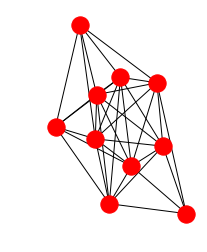

In [312]:
plt.subplot(121)
nx.draw(G)

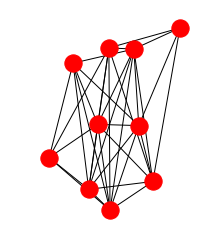

In [313]:
plt.subplot(121)
nx.draw(G, pos=nx.spring_layout(G))

In [314]:
G.edges

EdgeView([(0, 2), (0, 1), (0, 4), (0, 7), (0, 3), (0, 9), (0, 5), (0, 8), (1, 9), (1, 6), (1, 5), (1, 3), (1, 7), (1, 4), (2, 8), (2, 7), (2, 3), (2, 9), (3, 9), (3, 4), (3, 7), (4, 5), (4, 6), (4, 9), (4, 7), (4, 8), (5, 9), (5, 6), (5, 8), (5, 7), (6, 8), (7, 9), (7, 8), (8, 9)])

In [315]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [316]:
G.nodes(data=True)

NodeDataView({0: {'opinion': 1}, 1: {'opinion': 2}, 2: {'opinion': 1}, 3: {'opinion': 1}, 4: {'opinion': 3}, 5: {'opinion': 1}, 6: {'opinion': 1}, 7: {'opinion': 3}, 8: {'opinion': 3}, 9: {'opinion': 3}})

## Algorithm

In [317]:
def one_time_step(graph, phi, show_graph=False, layout=None, verbose=False):
    
    if layout==None:
        layout=nx.spring_layout(graph)
    node_i = int(np.random.choice(graph.nodes(), 1))
    
    if verbose:
        print('Node i selected : {0}'.format(node_i))
        
    if graph.degree[node_i] == 0:
        if verbose:
            print('Degree of node i is 0.')
        return graph
    else:
        bool_step = np.random.choice(np.array([True, False]), size=1, p=np.array([phi, 1-phi]))
        if bool_step:
            if verbose:
                print('DOING STEP 1')
            graph = Step_1(graph, node_i, verbose=verbose)
        else:
            if verbose:
                print('DOING STEP 2')
            graph = Step_2(graph, node_i, verbose=verbose)
    if show_graph:
        plt.figure()
        op = list(nx.get_node_attributes(graph, 'opinion').values())
        ax = nx.draw_networkx(graph, pos=layout, with_labels=True, node_color=op)
    return graph

In [318]:
def Step_1(graph, node_i, verbose):
    opinion_gi = graph.nodes[node_i]['opinion']
    
    edges_list = list(graph.edges(nbunch=node_i))
    edge_selected = int(np.random.choice(len(edges_list), 1))
    node_j = edges_list[edge_selected][1]
    
    nodes_with_gi = [n for n, attr in graph.nodes(data=True) if attr['opinion']==opinion_gi]
    node_j_prime = int(np.random.choice(nodes_with_gi, 1))

    graph.remove_edge(node_i, node_j)
    graph.add_edge(node_i, node_j_prime)
    if verbose:
        print('Edge moved from node {0} to node {1}'.format(node_j, node_j_prime))
    return graph

In [319]:
def Step_2(graph, node_i, verbose):
    neighbours = list(graph[node_i])
    node_j = int(np.random.choice(neighbours, 1))
    graph.node[node_i]['opinion'] = graph.node[node_j]['opinion']
    if verbose:
        print('Opinion of node {} m')
    return graph

## Some tests

------------- Step 0 ------------
Node i selected : 9
DOING STEP 2
Opinion of node {} m
------------- Step 1 ------------
Node i selected : 4
DOING STEP 1
Edge moved from node 3 to node 4
------------- Step 2 ------------
Node i selected : 7
DOING STEP 2
Opinion of node {} m
------------- Step 3 ------------
Node i selected : 2
DOING STEP 2
Opinion of node {} m
------------- Step 4 ------------
Node i selected : 9
DOING STEP 2
Opinion of node {} m
------------- Step 5 ------------
Node i selected : 9
DOING STEP 1
Edge moved from node 3 to node 0
------------- Step 6 ------------
Node i selected : 0
DOING STEP 1
Edge moved from node 4 to node 9
------------- Step 7 ------------
Node i selected : 2
DOING STEP 2
Opinion of node {} m
------------- Step 8 ------------
Node i selected : 1
DOING STEP 1
Edge moved from node 5 to node 6
------------- Step 9 ------------
Node i selected : 2
DOING STEP 2
Opinion of node {} m


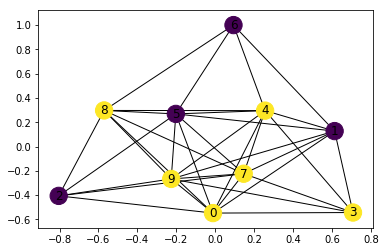

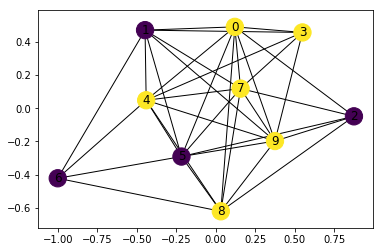

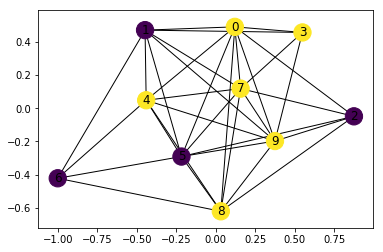

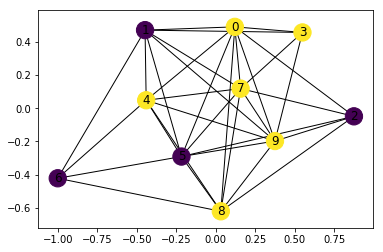

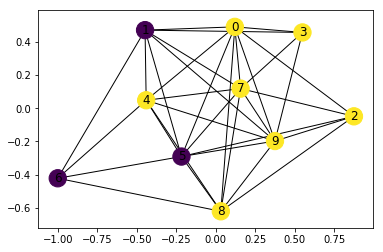

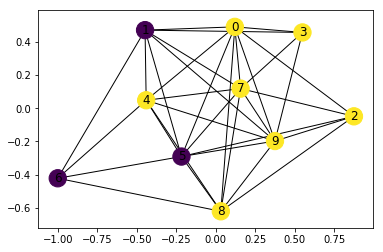

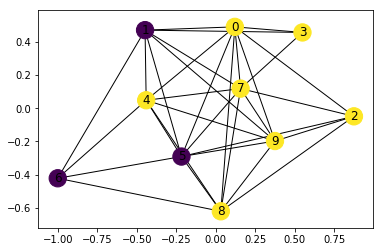

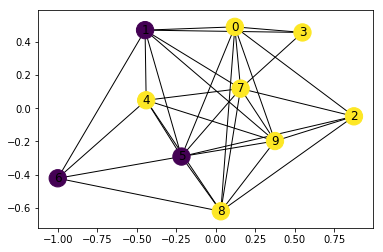

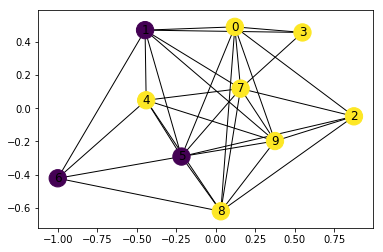

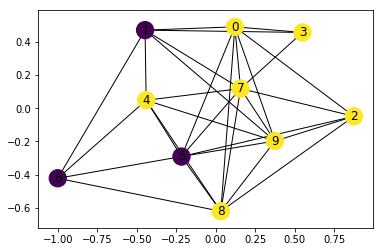

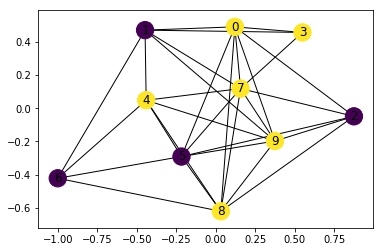

In [321]:
n_step = 10

op = list(nx.get_node_attributes(G, 'opinion').values())
nx.draw_networkx(G, with_labels=True, node_color=op)
layout = nx.spring_layout(G)

for i in range(n_step):
    print('------------- Step {0} ------------'.format(i))
    one_time_step(G, phi, show_graph=True, layout=layout, verbose=True)